___
# Big Mart 
___

In [1]:
# import the essential libraries

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import  stats

from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

plt.style.use('seaborn')

%matplotlib inline

___
### Importing the dataset
___

In [2]:
df = pd.read_csv('bigdatamart_Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# shape of the dataset
df.shape

(8523, 12)

In [5]:
# size of the dataframe
df.size

102276

In [6]:
# number of columns in the datset
len(df.columns)

12

In [7]:
# col names
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# seperate categorical and numerical columns
numerical_features = _find_numerical_variables(df)
categorical_features = _find_categorical_variables(df)

In [9]:
# numerical features (target incl.)
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [10]:
# categorical features
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
# total number of observations in the datset
len(df)

8523

In [12]:
# datatype and non null values of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
# statistical description of the features and the target.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
# get the unique values of each of the columns
df.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
# there are total of 1559 item in the datset
# There are 16 types of items
# There are 10 Outlet for the mart
# There are 4 tpyes of outlet and 4 sizes of outlet

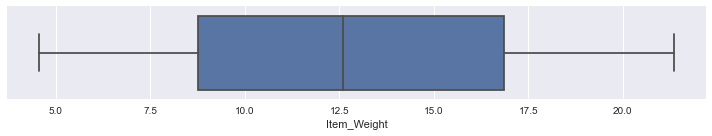

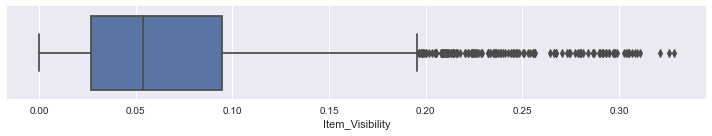

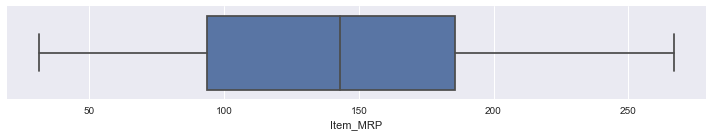

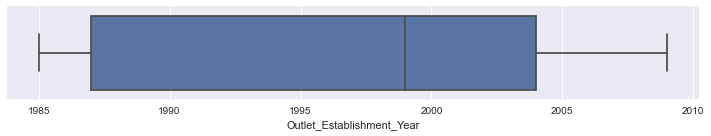

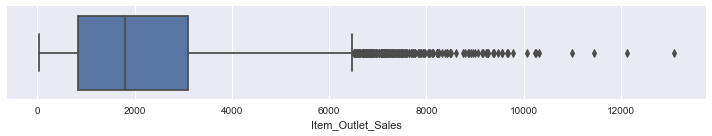

In [16]:
# get the boxplot of the numerical features

for col in numerical_features:
    
    plt.figure(figsize=(10,2))
    sns.boxplot(df[col],orient='h')
    plt.tight_layout()
    

In [17]:
# the features item visibility and Item outlet sales are seen with too much of Outliers

In [18]:
# let's check for the missing values in the dataset

In [19]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

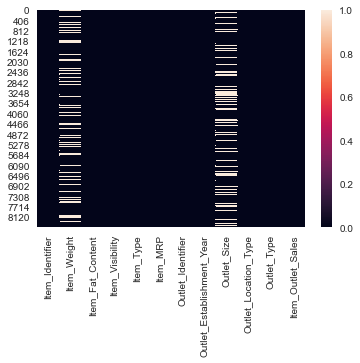

In [20]:
sns.heatmap(df.isna())

In [21]:
# there are 2 columns with missing data in the dataset..
# The columns are : 1. Outlet_Size and 2. Item_Weight

In [22]:
# let's get the percentage of values missing from each of the feature.
pd.DataFrame(df.isna().mean()*100,columns=['missing_data_%'])

,missing_data_%
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [23]:
# So missing data per column:
# 1. Item_Weight : 17% missing data
# 2. Outlet_Size : 28.3% missing data

In [24]:
# get the inter-correlation among the features of the data
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


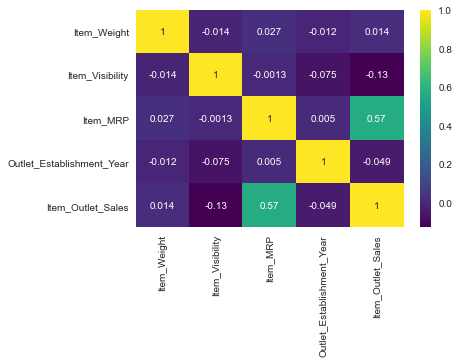

In [25]:
# visualize it!
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [26]:
# Let's address the missing data first

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [29]:
df['Item_Weight'].isna().sum()

1463

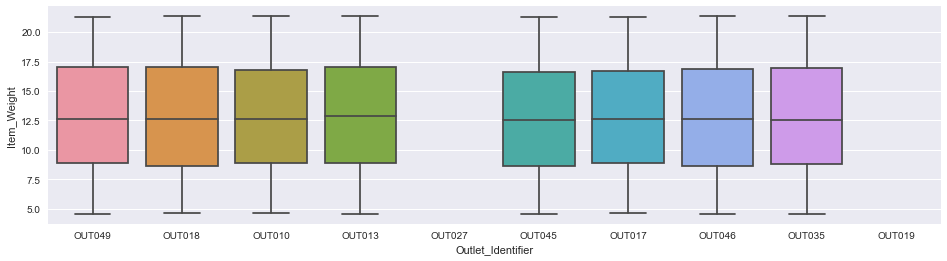

In [30]:
plt.figure(figsize=(16,4))
sns.boxplot(df['Outlet_Identifier'],df['Item_Weight'])

In [31]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
# We can see that the weights of the items coming out from the Outlet19 and Outlet24 were either not weights or were not recorded

In [33]:
# we will replace the missing weight with the avg of their respective Item_type
item_avg_weight = df.groupby('Item_Identifier').agg({'Item_Weight':'mean'})
#item_avg_weight.iloc[:,0]

# Let's create a feature called item_avg_weight
item_avg_weight_dict = dict(zip(item_avg_weight.index,item_avg_weight.iloc[:,0]))

In [34]:
# sanity check!
len(item_avg_weight),len(df),len(item_avg_weight_dict)

(1559, 8523, 1559)

In [35]:
df['Item_Avg_Weight'] = df['Item_Identifier'].map(item_avg_weight_dict)

In [36]:
df[df['Item_Avg_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,NaN
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,NaN
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,NaN
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,NaN


In [37]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Avg_Weight                 4
dtype: int64

In [38]:
# these above 4 items whose item weight is `NaN` appeared single time in the datset..thus there avg is also `NaN`.
# So we will just remove those values.
df = df.dropna(subset=['Item_Avg_Weight'])
df.reset_index(drop=True,inplace=True)  # This is to keep the indexing in Order

In [39]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1459
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Avg_Weight                 0
dtype: int64

In [40]:
# we are good to go!
# we have the average item weight as per item similar to it
# let's impute the missing values with the average value of the item i.e. replace it with the item_avg_weight column

df.loc[:,'Item_Weight'] = df.loc[:,'Item_Weight'].replace(to_replace=np.nan,value=df.loc[:,'Item_Avg_Weight'])

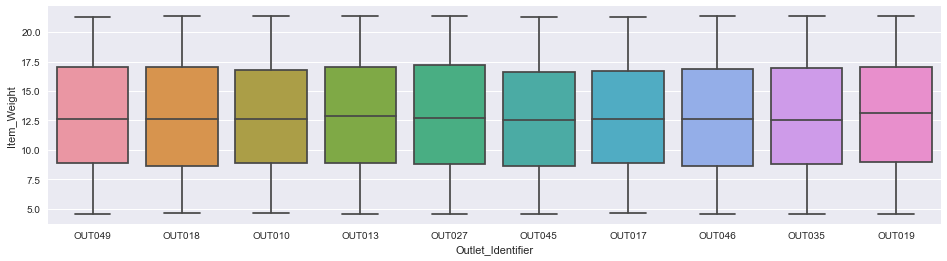

In [41]:
plt.figure(figsize=(16,4))
sns.boxplot(df['Outlet_Identifier'],df['Item_Weight'])

In [42]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Avg_Weight                 0
dtype: int64

In [43]:
# Imputation Successfull!

In [44]:
# let's turn our head toward the other column containing the null values
df['Outlet_Size'].value_counts()

Medium    2790
Small     2387
High       932
Name: Outlet_Size, dtype: int64

In [45]:
df['Outlet_Size'].isna().sum()

2410

In [46]:
df[df['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,16.200
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,19.200
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,13.000
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,5.925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8498,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688,8.420
8504,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646,11.350
8505,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804,8.100
8510,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232,15.000


In [47]:
df[df['Outlet_Size'].isna()]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [48]:
# So ,we can see that there is a pattern in the missing data in the outlet size
# The size of the outlet is missing from the samples only from where the Outlet type is eith Supermarket type1 or Grocery Score
# We can also say that the outlet size of the grocery store must be smaller than any other super market and Supermarket 1 has a Large outlet size considering1 is the largest/most flodding supermrkets
# Let's confirm our hypothesis

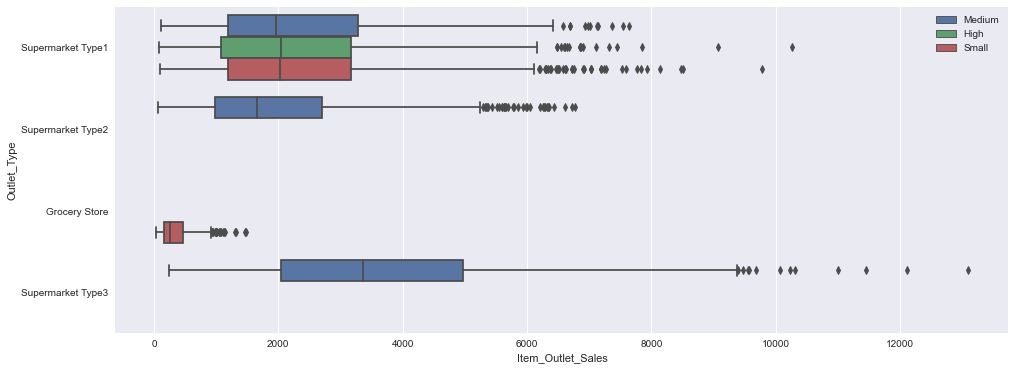

In [49]:
plt.figure(figsize=(16,6))

sns.boxplot(df['Item_Outlet_Sales'],df['Outlet_Type'],hue=df['Outlet_Size'])
plt.legend(bbox_to_anchor=(1,1))

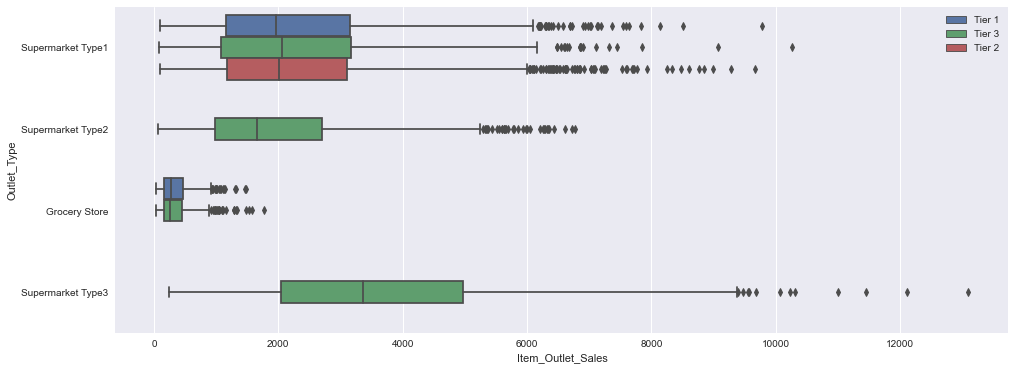

In [50]:
plt.figure(figsize=(16,6))

sns.boxplot(df['Item_Outlet_Sales'],df['Outlet_Type'],hue=df['Outlet_Location_Type'])
plt.legend(bbox_to_anchor=(1,1))

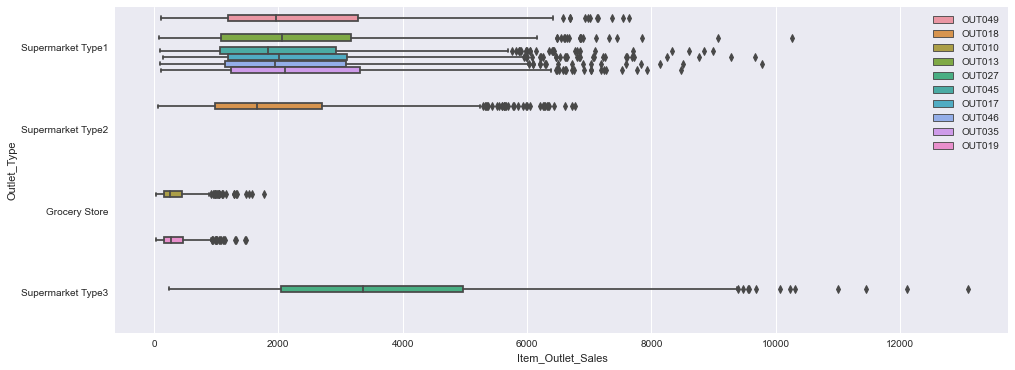

In [51]:
plt.figure(figsize=(16,6))

sns.boxplot(df['Item_Outlet_Sales'],df['Outlet_Type'],hue=df['Outlet_Identifier'])
plt.legend(bbox_to_anchor=(1,1))

In [52]:
# All the grocery have a Small outlet as their Outlet sales in very less
# Now we have an issue as the Super Market1 has all types of Outlet sizes
# There is no such robust relation that we can get which gives us then exact Outlet_Size of the supermarket1,the outlet sizes are equally distributed .
# Do lets just put them into medium.

In [53]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Avg_Weight                 0
dtype: int64

In [54]:
# we will impute the data in the Outlet size column with respect to the Outlet Type 

for i in range(len(df)):
    

    if pd.isna(df.loc[i,'Outlet_Size']):
    
        if df.loc[i,'Outlet_Type'] == 'Grocery Store':
            
            df.loc[i,'Outlet_Size'] = 'Small'
            
        else:
            
            df.loc[i,'Outlet_Size'] = 'Medium'
            
        

In [55]:
# imputation successfull

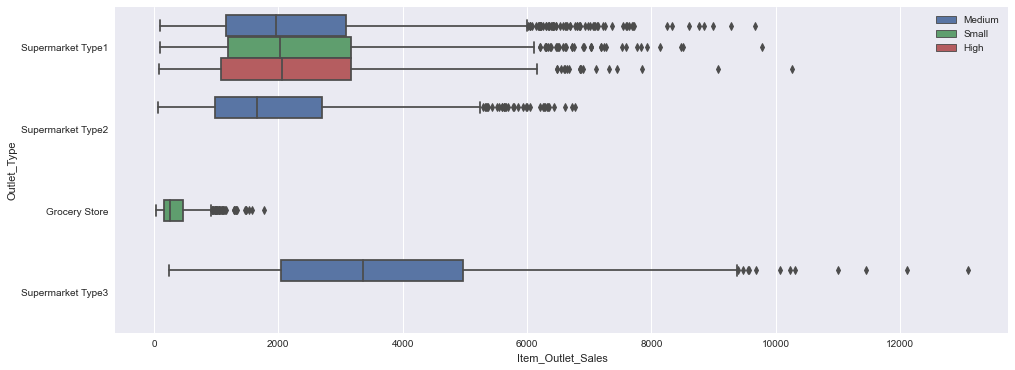

In [56]:
plt.figure(figsize=(16,6))

sns.boxplot(df['Item_Outlet_Sales'],df['Outlet_Type'],hue=df['Outlet_Size'])
plt.legend(bbox_to_anchor=(1,1))

In [57]:
# confirmation
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Avg_Weight              0
dtype: int64

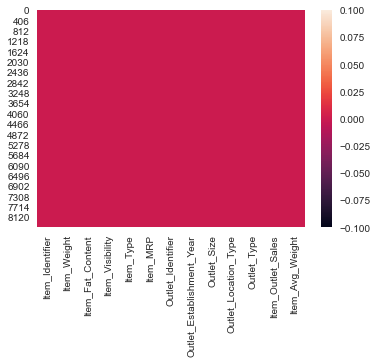

In [58]:
# heatmap
sns.heatmap(df.isna())

In [59]:
# We have successfully imputed the missing values

In [60]:
# let's look at another interseting feature i.e. `Item Visibility`
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.072655      2
0.187841      2
0.107224      2
           ... 
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.050902      1
Name: Item_Visibility, Length: 7876, dtype: int64

In [61]:
# The Item_Visibility is the shelf/display percentage of an item.
# The Item Visibility of an item would never be 0...If it was zero ..the item would sell at all
# So thoses zeros must be the missing values in the dataset

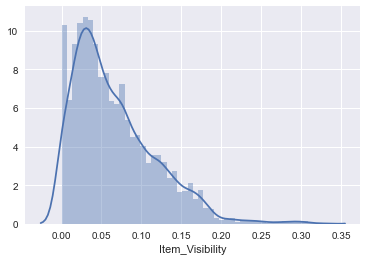

In [62]:
# distribution of the Item_Visibility feature
sns.distplot(df['Item_Visibility'])

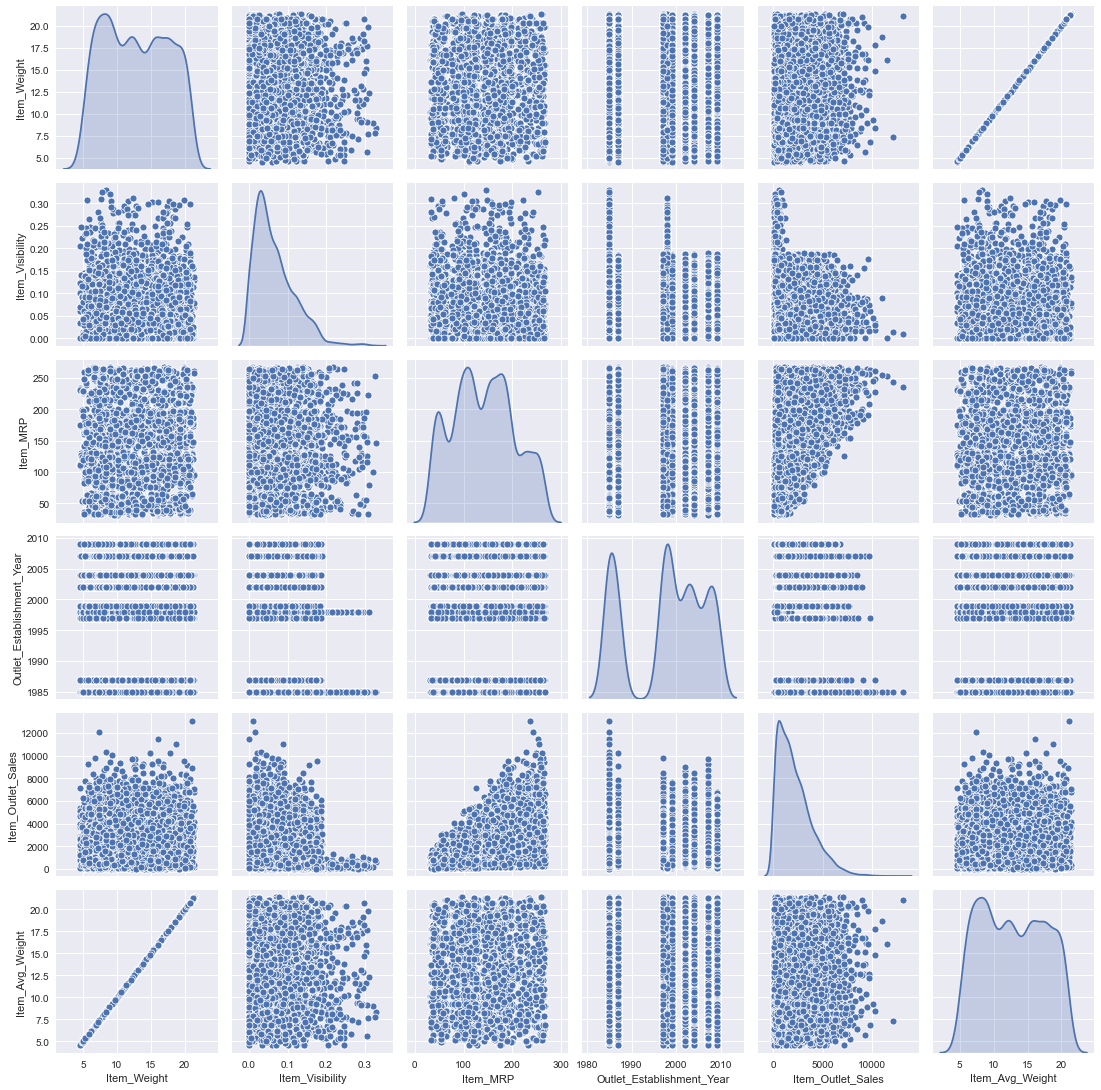

In [63]:
# the item visibility is quite skewed
sns.pairplot(df,diag_kind='kde')

In [64]:
# Item Visibility and Item_outlet_Sales have a positively skewed distribution

In [65]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [66]:
# let's try and remove the last 1 quantile form both of the skewed feautures mentioned above

In [67]:
# removing the last 1 percentile of observation wrt the quantile_item_visibility feature 

quantile_item_visibility = df['Item_Visibility'].quantile(0.99)

df_cleaned = df[df['Item_Visibility']<quantile_item_visibility]

In [68]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


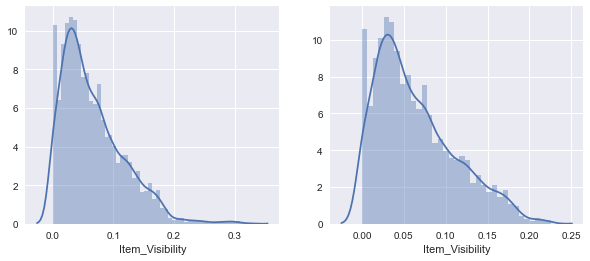

In [69]:
fig = plt.figure(figsize=(10,4))

fig.add_subplot(121)
sns.distplot(df['Item_Visibility'])

fig.add_subplot(122)
sns.distplot(df_cleaned['Item_Visibility'])

In [70]:
# removing the last 1 percentile of the observations wrt the Item_OUtlet_Sales 

quantile_outlet_sales = df_cleaned['Item_Outlet_Sales'].quantile(0.99)

df_cleaned = df_cleaned[df['Item_Outlet_Sales']<quantile_outlet_sales]

<ipython-input-70-72d36498ab21>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df['Item_Outlet_Sales']<quantile_outlet_sales]


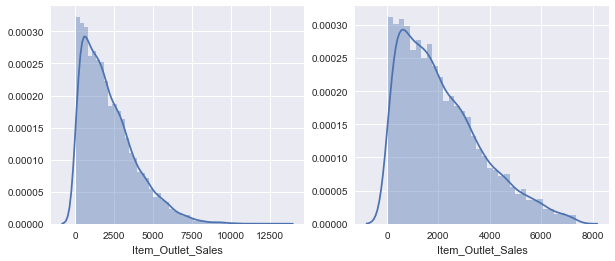

In [71]:
fig = plt.figure(figsize=(10,4))

fig.add_subplot(121)
sns.distplot(df['Item_Outlet_Sales'])

fig.add_subplot(122)
sns.distplot(df_cleaned['Item_Outlet_Sales'])

In [72]:
# We removed the last 1 percentile of the values form the skewed values to remove some outliers

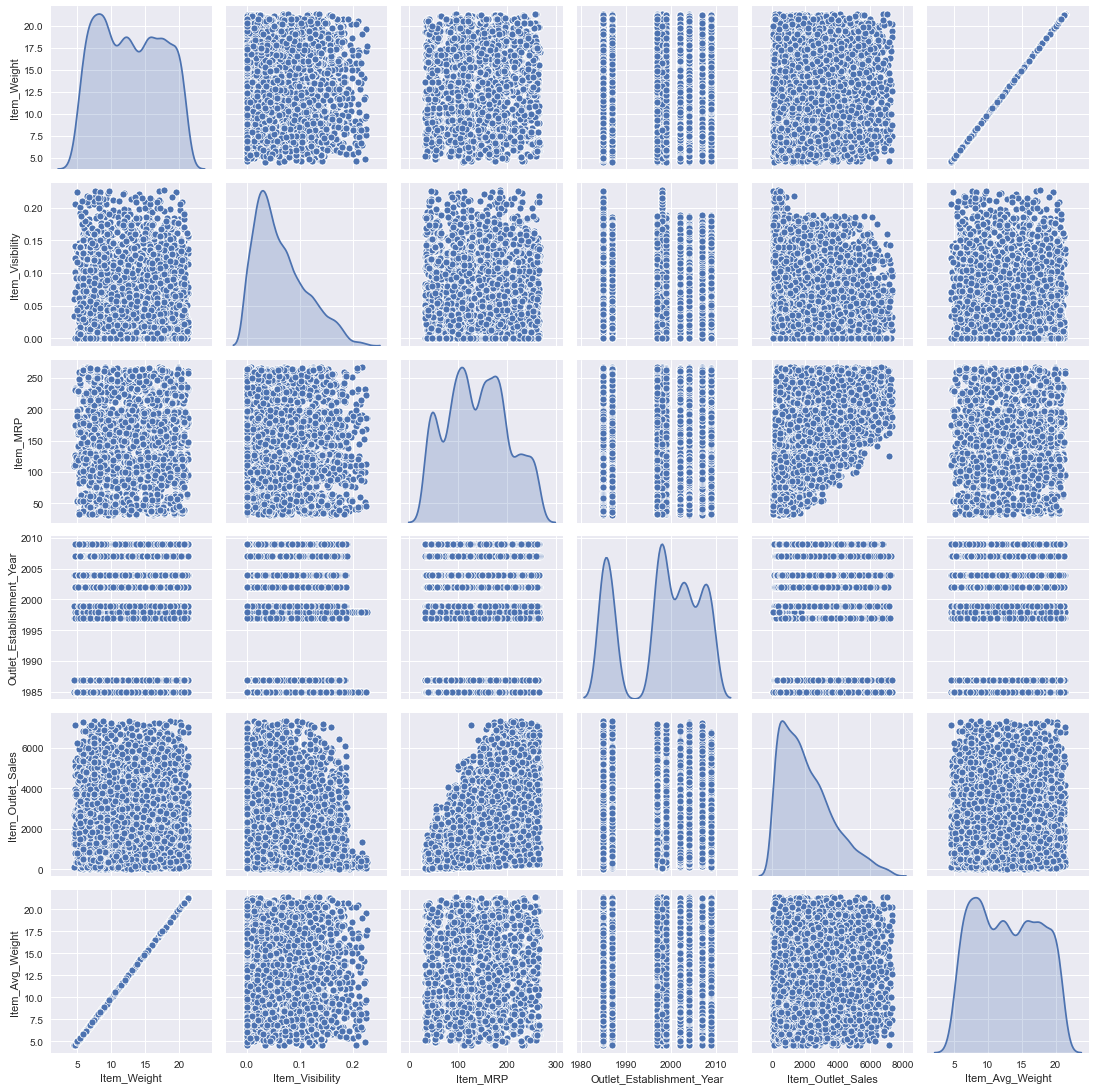

In [73]:
# let's get the pairplot of the cleaned dataframe
sns.pairplot(df_cleaned,diag_kind='kde')

In [74]:
# This pairplot looks much better than the earlier one.

In [75]:
# Almost all of the outliers are removed in the cleaned dataframe

In [76]:
# check the skewness of the clenaed dataframe
df_cleaned.skew()

Item_Weight                  0.070371
Item_Visibility              0.810123
Item_MRP                     0.136905
Outlet_Establishment_Year   -0.422405
Item_Outlet_Sales            0.884953
Item_Avg_Weight              0.070371
dtype: float64

In [77]:
# The standard valid skewness of a feature is -1 < Valid Skew < +1 .All of our feautres are in between this range,
# so every features in the cleaned dataset has an valid skew

In [78]:
print('Total number of records removed:',len(df) - len(df_cleaned) - 4)   # 4 are those unique single products which had Nan as Weights

Total number of records removed: 168


In [79]:
# We removed a total of 168 observations from the raw dataset
print('percentage of observations removed :', (len(df)-len(df_cleaned)-4)/len(df) * 100 )

percentage of observations removed : 1.9720624486442069


In [80]:
# head of the cleaned dataframe
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [81]:
df_cleaned['Item_Visibility'].value_counts()

0.000000    521
0.076975      3
0.076483      2
0.076792      2
0.080640      2
           ... 
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.013573      1
Name: Item_Visibility, Length: 7712, dtype: int64

In [82]:
# item visibility has 521 records with 0 values 

In [83]:
# let's replace the 0 with Nan values
df_cleaned['Item_Visibility'] = df_cleaned['Item_Visibility'].replace(to_replace=0,value=np.nan)

In [84]:
df_cleaned.isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              521
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Item_Avg_Weight                0
dtype: int64

In [85]:
df_cleaned[df_cleaned['Item_Visibility'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight
3,FDX07,19.200,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,8.930,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
5,FDP36,10.395,Regular,NaN,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,10.395
10,FDY07,11.800,Low Fat,NaN,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,11.800
32,FDP33,18.700,Low Fat,NaN,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,18.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,FDQ58,7.315,Low Fat,NaN,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020,7.315
8480,DRJ49,6.865,Low Fat,NaN,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736,6.865
8482,FDR20,20.000,Regular,NaN,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744,20.000
8490,NCI54,15.200,Low Fat,NaN,Household,110.4912,OUT017,2007,Medium,Tier 2,Supermarket Type1,1637.8680,15.200


In [86]:
avg_item_visibility_wrt_item_type  = df_cleaned.groupby('Item_Type').agg({'Item_Visibility':['mean','std']}).sort_values(('Item_Visibility', 'mean'),ascending=False)

In [87]:
avg_item_visibility_wrt_item_type

Item_Visibility          
                                 mean       std
Item_Type                                      
Breakfast                    0.083783  0.042608
Dairy                        0.074320  0.047218
Starchy Foods                0.073179  0.048348
Baking Goods                 0.072216  0.046009
Seafood                      0.071264  0.045406
Fruits and Vegetables        0.071260  0.046237
Canned                       0.070414  0.049910
Snack Foods                  0.068872  0.045566
Breads                       0.068804  0.041925
Hard Drinks                  0.068559  0.044218
Frozen Foods                 0.067662  0.043022
Soft Drinks                  0.067564  0.046510
Others                       0.064030  0.049052
Household                    0.063151  0.047088
Meat                         0.062847  0.047936
Health and Hygiene           0.057845  0.040823

In [88]:
# There is a pattern in item_visibility ,the visibility increases with respect to the the item type 
# We will replace the average item visibility wrt to the average item type visiblity
#item_avg_weight_dict = dict(zip(item_avg_weight.index,item_avg_weight.iloc[:,0]))

In [89]:
avg_item_visibility_wrt_item_type.iloc[:,0]

Item_Type
Breakfast                0.083783
Dairy                    0.074320
Starchy Foods            0.073179
Baking Goods             0.072216
Seafood                  0.071264
Fruits and Vegetables    0.071260
Canned                   0.070414
Snack Foods              0.068872
Breads                   0.068804
Hard Drinks              0.068559
Frozen Foods             0.067662
Soft Drinks              0.067564
Others                   0.064030
Household                0.063151
Meat                     0.062847
Health and Hygiene       0.057845
Name: (Item_Visibility, mean), dtype: float64

In [90]:
avg_item_visibility_wrt_item_type_dict = dict(zip(avg_item_visibility_wrt_item_type.index,np.round(avg_item_visibility_wrt_item_type.iloc[:,0],4)))

In [91]:
avg_item_visibility_wrt_item_type_dict

{'Breakfast': 0.0838,
 'Dairy': 0.0743,
 'Starchy Foods': 0.0732,
 'Baking Goods': 0.0722,
 'Seafood': 0.0713,
 'Fruits and Vegetables': 0.0713,
 'Canned': 0.0704,
 'Snack Foods': 0.0689,
 'Breads': 0.0688,
 'Hard Drinks': 0.0686,
 'Frozen Foods': 0.0677,
 'Soft Drinks': 0.0676,
 'Others': 0.064,
 'Household': 0.0632,
 'Meat': 0.0628,
 'Health and Hygiene': 0.0578}

In [92]:
# create a new column with this avg_item_visibility_wrt_item_type_dict value 
df_cleaned['Avg_item_visibility_wrt_item_type'] = df_cleaned['Item_Type'].map(avg_item_visibility_wrt_item_type_dict)

In [93]:
 df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight,Avg_item_visibility_wrt_item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.0743
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.0676
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.0628
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.0713
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.0632


In [94]:
df_cleaned.isna().sum()

Item_Identifier                        0
Item_Weight                            0
Item_Fat_Content                       0
Item_Visibility                      521
Item_Type                              0
Item_MRP                               0
Outlet_Identifier                      0
Outlet_Establishment_Year              0
Outlet_Size                            0
Outlet_Location_Type                   0
Outlet_Type                            0
Item_Outlet_Sales                      0
Item_Avg_Weight                        0
Avg_item_visibility_wrt_item_type      0
dtype: int64

In [95]:
# let's replace the missing values in the from the visibility featres and replace them with the corresponding avg_item_visibility_wrt_item type column
df_cleaned['Item_Visibility'] = df_cleaned['Item_Visibility'].replace(to_replace=np.nan,value=df_cleaned['Avg_item_visibility_wrt_item_type'])

In [96]:
df_cleaned.isna().sum()

Item_Identifier                      0
Item_Weight                          0
Item_Fat_Content                     0
Item_Visibility                      0
Item_Type                            0
Item_MRP                             0
Outlet_Identifier                    0
Outlet_Establishment_Year            0
Outlet_Size                          0
Outlet_Location_Type                 0
Outlet_Type                          0
Item_Outlet_Sales                    0
Item_Avg_Weight                      0
Avg_item_visibility_wrt_item_type    0
dtype: int64

In [97]:
# imputation successfull!

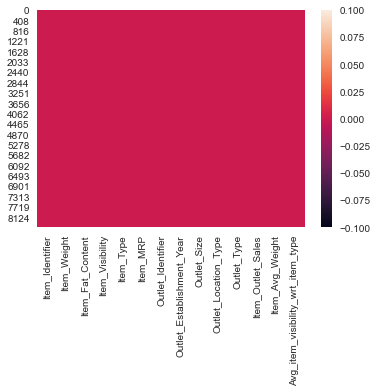

In [98]:
sns.heatmap(df_cleaned.isna())

In [99]:
# great!

In [100]:
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight,Avg_item_visibility_wrt_item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.0743
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.0676
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.0628
3,FDX07,19.20,Regular,0.071300,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.0713
4,NCD19,8.93,Low Fat,0.063200,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.0632


In [101]:
# towards the item_fat_content feature

In [102]:
df_cleaned['Item_Fat_Content'].value_counts()

Low Fat    4992
Regular    2823
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64

In [103]:
# the same attribute in the featur is represented by various different string
# Merge them!

In [104]:
df_cleaned['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [105]:
df_cleaned['Item_Fat_Content'].value_counts()

Low Fat    5408
Regular    2939
Name: Item_Fat_Content, dtype: int64

In [106]:
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight,Avg_item_visibility_wrt_item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.0743
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.0676
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.0628
3,FDX07,19.20,Regular,0.071300,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.0713
4,NCD19,8.93,Low Fat,0.063200,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.0632


In [107]:
# The feature outlet establishment year doesnt provide much of information
# Let's create a new feature which give the age of the outlet

In [108]:
# get the most recent outlet
df_cleaned['Outlet_Establishment_Year'].max()

2009

In [109]:
# cosidering this data is of this year...we will calculate the age of the Outlet

In [110]:
# total number of outlets
len(df_cleaned['Outlet_Identifier'].unique())

10

In [111]:
# there are in total 10 outlets ,create a new feature as Outlet_Age

df_cleaned['Outlet_Age'] = df_cleaned['Outlet_Establishment_Year'].apply(lambda x: 2020-x)

In [112]:
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight,Avg_item_visibility_wrt_item_type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.0743,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.0676,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.0628,21
3,FDX07,19.20,Regular,0.071300,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.0713,22
4,NCD19,8.93,Low Fat,0.063200,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.0632,33


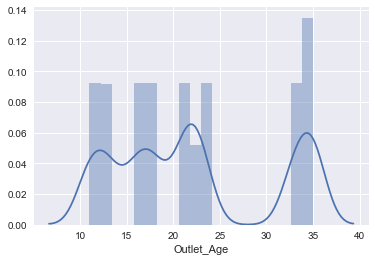

In [113]:
sns.distplot(df_cleaned['Outlet_Age'],bins=20)

In [114]:
# the age of the outlets are in between 10 to 35 years.

In [115]:
# let's see if there is any relation between the age of the outlet and its sales

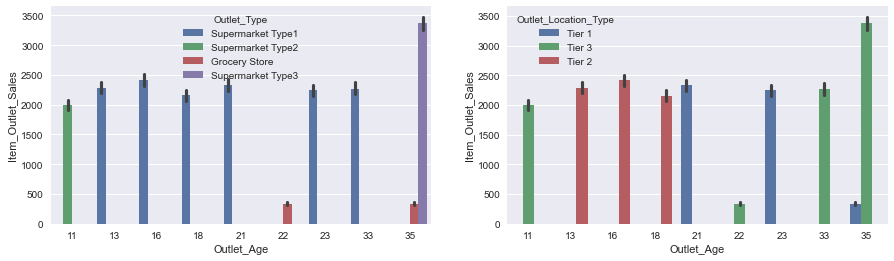

In [116]:
fig = plt.figure(figsize=(15,4))

fig.add_subplot(121)
sns.barplot(df_cleaned['Outlet_Age'],df_cleaned['Item_Outlet_Sales'],hue=df['Outlet_Type'],)

fig.add_subplot(122)
sns.barplot(df_cleaned['Outlet_Age'],df_cleaned['Item_Outlet_Sales'],hue=df['Outlet_Location_Type'])

In [117]:
# There is no significant age factor of the outlet affecting the sales of the same unless the age exceeds 34 yrs.
# The `Supermaket type 2` located in the `third tier` is one of the `oldest` outlet of them all (35 year old) has very high outlet sales in comparision two the other outlets 

In [118]:
# The outlet sales margin between the 3 oldest outlets
df_cleaned.sort_values('Outlet_Age',ascending=False).head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight,Avg_item_visibility_wrt_item_type,Outlet_Age
2931,FDN57,18.25,Low Fat,0.053972,Snack Foods,141.2154,OUT027,1985,Medium,Tier 3,Supermarket Type3,3119.9388,18.25,0.0689,35
4375,FDE11,17.70,Regular,0.134442,Starchy Foods,183.9924,OUT027,1985,Medium,Tier 3,Supermarket Type3,6478.2340,17.70,0.0732,35
4386,FDP46,15.35,Low Fat,0.130642,Snack Foods,88.3830,OUT019,1985,Small,Tier 1,Grocery Store,89.8830,15.35,0.0689,35


In [119]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


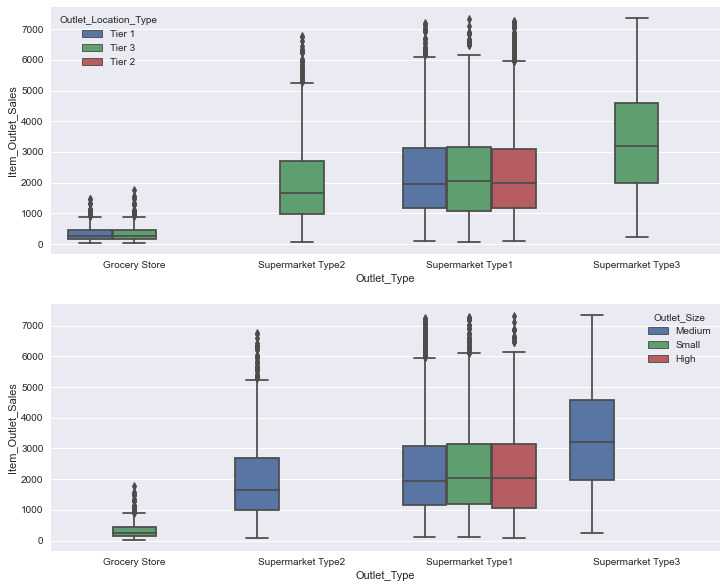

In [120]:
fig = plt.figure(figsize=(12,10))

fig.add_subplot(211)
sns.boxplot(df_cleaned['Outlet_Type'],df['Item_Outlet_Sales'],order=df_cleaned.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['mean']).sort_values('mean').index,hue=df_cleaned['Outlet_Location_Type'])

fig.add_subplot(212)
sns.boxplot(df_cleaned['Outlet_Type'],df['Item_Outlet_Sales'],order=df_cleaned.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['mean']).sort_values('mean').index,hue=df_cleaned['Outlet_Size'])

In [121]:
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight,Avg_item_visibility_wrt_item_type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.0743,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.0676,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.0628,21
3,FDX07,19.20,Regular,0.071300,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.0713,22
4,NCD19,8.93,Low Fat,0.063200,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.0632,33


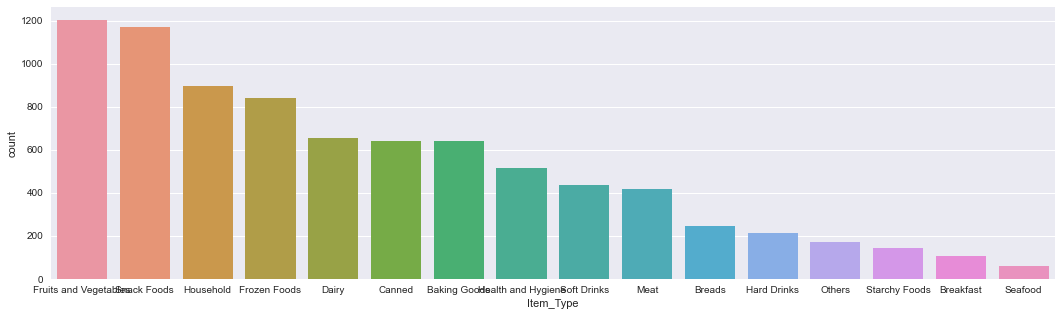

In [122]:
# count the number of products in each of the item_type
plt.figure(figsize=(18,5))
sns.countplot(df_cleaned['Item_Type'],order=df_cleaned['Item_Type'].value_counts().index)

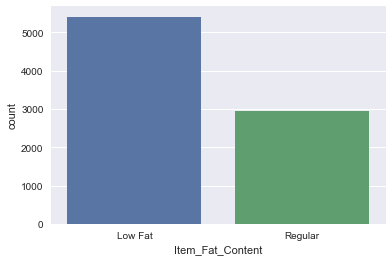

In [123]:
# count the number of regular and low fat items
sns.countplot(df_cleaned['Item_Fat_Content'],order=df_cleaned['Item_Fat_Content'].value_counts().index)

In [124]:
# Let's get the correation beteen the feautres on the cleaned dataframe
df_cleaned.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Avg_Weight,Avg_item_visibility_wrt_item_type,Outlet_Age
Item_Weight,1.000000,-0.017469,0.024358,-0.012499,0.006529,1.000000,-0.017134,0.012499
Item_Visibility,-0.017469,1.000000,-0.003350,-0.048244,-0.099582,-0.017469,0.101720,0.048244
Item_MRP,0.024358,-0.003350,1.000000,0.018143,0.569124,0.024358,0.014162,-0.018143
Outlet_Establishment_Year,-0.012499,-0.048244,0.018143,1.000000,-0.025068,-0.012499,0.009110,-1.000000
Item_Outlet_Sales,0.006529,-0.099582,0.569124,-0.025068,1.000000,0.006529,0.006506,0.025068
Item_Avg_Weight,1.000000,-0.017469,0.024358,-0.012499,0.006529,1.000000,-0.017134,0.012499
Avg_item_visibility_wrt_item_type,-0.017134,0.101720,0.014162,0.009110,0.006506,-0.017134,1.000000,-0.009110
Outlet_Age,0.012499,0.048244,-0.018143,-1.000000,0.025068,0.012499,-0.009110,1.000000


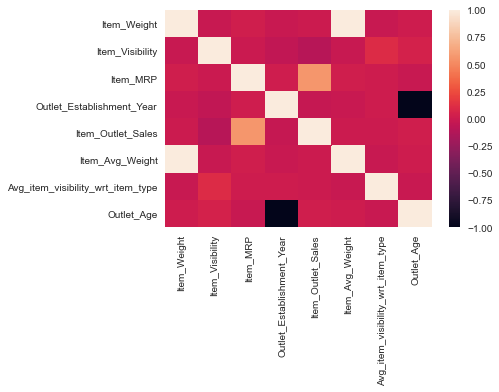

In [125]:
# correlation heatmap
sns.heatmap(df_cleaned.corr())

In [126]:
# The 2 derived features are perfectly correalated with each other

In [127]:
# Encoding the categorical featrues

In [128]:
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight,Avg_item_visibility_wrt_item_type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.0743,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.0676,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.0628,21
3,FDX07,19.20,Regular,0.071300,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.0713,22
4,NCD19,8.93,Low Fat,0.063200,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.0632,33


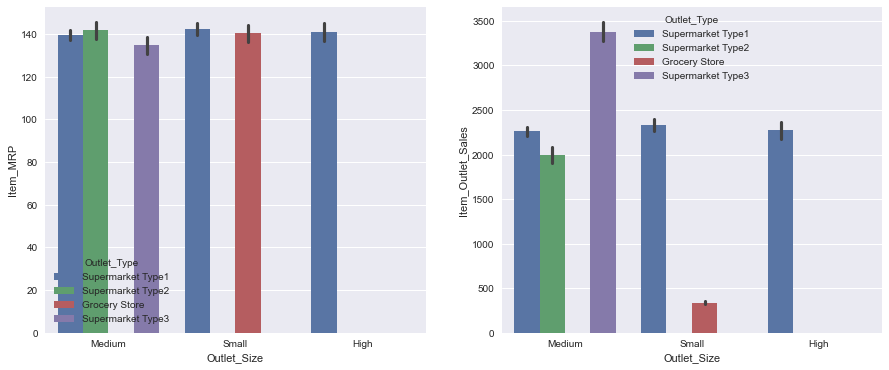

In [129]:
fig = plt.figure(figsize=(15,6))

fig.add_subplot(121)
sns.barplot(df_cleaned['Outlet_Size'],df_cleaned['Item_MRP'],hue=df_cleaned['Outlet_Type'])

fig.add_subplot(122)
sns.barplot(df_cleaned['Outlet_Size'],df_cleaned['Item_Outlet_Sales'],hue=df_cleaned['Outlet_Type'])

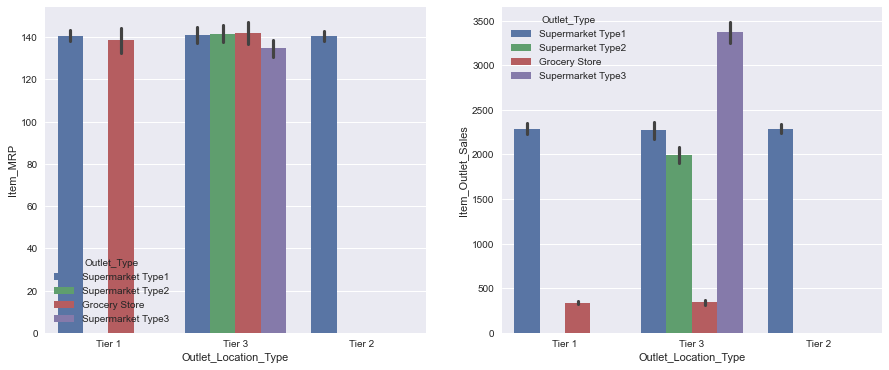

In [130]:
fig = plt.figure(figsize=(15,6))

fig.add_subplot(121)
sns.barplot(df_cleaned['Outlet_Location_Type'],df_cleaned['Item_MRP'],hue=df_cleaned['Outlet_Type'])

fig.add_subplot(122)
sns.barplot(df_cleaned['Outlet_Location_Type'],df_cleaned['Item_Outlet_Sales'],hue=df_cleaned['Outlet_Type'])

In [131]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Avg_Weight
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [132]:
# The columns to be encoded are : 
# 1. Item_fat_content
# 2. Outlet size
# 3. Outlet Location type
# 4. OUtlet type
# 5. Item_Type

In [133]:
# Let's apply one hot encoding on the categorical features
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

features_to_encode = 'Item_Type Item_Fat_Content Outlet_Size Outlet_Location_Type Outlet_Type'.split()

encoder = OneHotCategoricalEncoder(variables=features_to_encode,drop_last=True)

df_cleaned = encoder.fit_transform(df_cleaned)


In [134]:
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Avg_Weight,Avg_item_visibility_wrt_item_type,Outlet_Age,...,Item_Type_Starchy Foods,Item_Type_Others,Item_Fat_Content_Low Fat,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,9.30,0.0743,21,...,0,0,1,1,0,1,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,5.92,0.0676,11,...,0,0,0,1,0,0,1,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,17.50,0.0628,21,...,0,0,1,1,0,1,0,1,0,0
3,FDX07,19.20,0.071300,182.0950,OUT010,1998,732.3800,19.20,0.0713,22,...,0,0,0,0,1,0,1,0,0,1
4,NCD19,8.93,0.063200,53.8614,OUT013,1987,994.7052,8.93,0.0632,33,...,0,0,1,0,0,0,1,1,0,0


In [135]:
# create X and y
X = df_cleaned.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Avg_Weight','Item_MRP'],1)
y = df_cleaned['Item_MRP']

In [136]:
# Create train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=42)

# get the shapes
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6510, 28), (6510,), (1837, 28), (1837,))

In [137]:
# Applying standard scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc.fit_transform(np.expand_dims(y_train,1))
y_test = sc.transform(np.expand_dims(y_test,1))

In [138]:
# training the  model

In [139]:
# importing the training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [140]:
# importing the metric dependencies
from sklearn.metrics import r2_score,mean_squared_error as mse
from sklearn.model_selection import cross_val_score,KFold

In [141]:
# define a function that will train the model and return the mse and the r2 score 
def train_n_score(model):
    
    model.fit(X_train,y_train.ravel())
    
    print('R2-score:',r2_score(y_test,model.predict(X_test)))
    
    print('MSE:',mse(y_test,model.predict(X_test)))
    
    print('Avg_CVscore:',np.mean(cross_val_score(model,X,y,cv=KFold(10,shuffle=True),scoring='r2')))

In [142]:
# linear regression

train_n_score(LinearRegression())

R2-score: 0.42604931980150595
MSE: 0.5931057223219948
Avg_CVscore: 0.42997269891396


In [143]:
# SVR

train_n_score(SVR())

R2-score: 0.411963902004181
MSE: 0.6076612271503893
Avg_CVscore: 0.3167001764866203


In [144]:
# Decision Tree

train_n_score(DecisionTreeRegressor())

R2-score: 0.12453738447599938
MSE: 0.904680323345364
Avg_CVscore: 0.07931220852983602


In [145]:
# Random Forest

train_n_score(RandomForestRegressor())

R2-score: 0.5265056801550477
MSE: 0.4892967292762499
Avg_CVscore: 0.5121403816299672


In [146]:
# GradientBoosting

train_n_score(GradientBoostingRegressor())

R2-score: 0.5215286396158965
MSE: 0.4944398736714762
Avg_CVscore: 0.5135467643771008


In [149]:
# AdAdaBoostRegressor

train_n_score(AdaBoostRegressor(RandomForestRegressor()))

R2-score: 0.4338310298358329
MSE: 0.5850643053326227
Avg_CVscore: 0.4193760580626922


In [150]:
# The adaboost model is giving us the best results overall let's finalize the model
best_model = AdaBoostRegressor(RandomForestRegressor(max_depth=15, min_samples_leaf=100))
best_model.fit(X_train,y_train.ravel())

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=15,
                                                       min_samples_leaf=100))

In [151]:
import joblib

In [152]:
joblib.dump(best_model,'big_data_mart_adaboost.pkl')

['big_data_mart_adaboost.pkl']